# <center> Tarea 1

###     Punto 1
    
*Related with the nature of the data, which conditions should meet matrices $A$ and $b$ to be solvable from the least squares perspective.*

Para desarrollar satisfactoriamente esta pregunta vamos a analizar cómo surge el problema de mínimos cuadrados relativo a la naturaleza de los datos.

Dado un conjunto de datos $\mathcal{D} = \{ \vec{u}_i, v_i \}_{i = 1, \ldots, N} \subset \mathbb{R}^{d+1}$, con ánimos de predecir o estimar datos no suministrados ajustaremos los datos dados a un modelo lineal. Supongamos que el hiperplano que mejor se ajusta a los datos es $ \vec{w}^T \vec{x} + r = 0 $, luego el error de estimación del modelo en cada dato es

$$
    \varepsilon_i = \vec{w}^T \vec{u}_i  + r - v_i = r + \vec{u}_i^T \vec{w} - v_i, \quad\quad i=1, \ldots, N.
$$

Ejemplificamos mediante la siguiente gráfica cada uno de estos errores representado por las líneas rojas.

In [2]:
# Importamos las librerias para generar datos aleatorios de acuerdo a una distribución y para graficar los resultados
using Plots, Random, Distributions

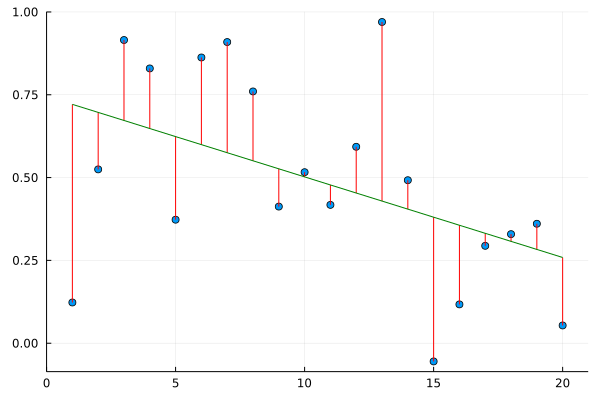

In [3]:
n = 20; # Cantidad de datos
A = [ones(n,1) Array((1:n))]; # Matriz del sistema de mínimos cuadrados (se discute luego)
b = rand(Normal(0.5, 0.25), n); # Generados puntos aleatorios bien distribuidos
x = A\b; # Solucionamos por mínimos cuadrados y encontramos los parámetros del modelo lineal

lmodel = x[2]*A[:,2] + x[1]*ones(n,1) # Definimos el modelo lineal encontrado

plot(1:n, b, seriestype = :scatter, legend = false, xlims = (0, n + 0.99)) # Graficamos los puntos
for i in 1:n   # Graficamos los errores del modelo en cada punto
    plot!([i, i], [b[i], lmodel[i]], color = "red")
end
plot!(1:n, lmodel, color = "green") # Graficamos la aproximación lineal

Podemos expresar lo anterior matricialmente como $\vec{\varepsilon} = A\vec{x} - \vec{v}$ donde 

$$
    A = 
    \begin{pmatrix}
      1 & - & \vec{u}_1^T & - \\ 
      1 & - & \vec{u}_2^T & - \\
      \vdots &  & \vdots &  \\
      1 & - & \vec{u}_N^T & - \\
    \end{pmatrix}
    \in \mathcal{M}_{N \times (d+1)}(\mathbb{R}),
    \quad
    \vec{x} = ( r, \vec{w} )^T
    \quad
    \text{y}
    \quad
    \vec{v} = (v_1, v_2, \ldots, v_N)^T.
$$

Para obtener un bueno modelo buscamos minimizar el error y para ello una forma de hacerlo es minimizar el cuadrado de la norma de este vector de error, planteando así el siguiente problema de optimización:

$$
    \mbox{arg min}_{\vec{x}} \| \varepsilon \|_2^2 = \mbox{arg min}_{\vec{x}} \| A\vec{x} - \vec{v} \|_2^2.
$$

Con lo anterior no solo llegamos al problema de los mínimos cuadrados como es conocido sino que además encontramos una forma más explícita de sus elementos en términos de los datos. Ahora, intentamos resolver el problema para ver cuáles son las condiciones sobre $A$ y $\vec{v}$ para que el problema tenga solución y luego ver estas condiciones en términos de los datos.

La función objetivo del problema es $f(\vec{x}) = \| A\vec{x} - \vec{v} \|_2^2$ que es una función convexa pues $A\vec{x} - \vec{v}$ es lineal y luego su cuadrado es convexo, con lo cual el problema de optimización **es un problema convexo** y, afortunamente de este tipo de problemas sabemos muy bien cómo atacarlos, en principio sabemos que si la función objetivo es diferenciable entonces el mínimo global estará en el punto crítico. Para trabajar sobre la anterior idea observemos que la función objetivo la podemos reescribir como

$$
    \begin{align*}
        f(\vec{x}) & = \| A\vec{x} - \vec{v}\|_2^2 \\
            & = ( A\vec{x} - \vec{v} )^T ( A\vec{x} - \vec{v} ) \\
            & = (A \vec{x})^T (A \vec{x}) - (A \vec{x})^T \vec{v} - \vec{v}^T (A \vec{x}) + \vec{v}^T \vec{v} \\
            & = \vec{x}^T A^T A\vec{x} - 2 \vec{x}^T A^T \vec{v} + \vec{v}^T \vec{v}
    \end{align*}
$$

Con lo cual podemos calcular su derivada

$$
    \frac{\partial}{\partial\vec{x}}\left( f(\vec{x}) \right) = \frac{\partial}{\partial\vec{x}}\left( \vec{x}^T A^T A\vec{x} - 2 \vec{x}^T A^T \vec{v} + \vec{v}^T \vec{v} \right)  = - 2 A^T \vec{v} + 2 A^T A \vec{x}
$$

de manera que los puntos críticos de la función están dados por

$$
    A^T A \vec{x} = A^T \vec{v}
$$

De manera que nuestro problema de optimización se transforma en un sistema de ecuaciones lineales que podemos estudiar:

De acuerdo a la ecuación $A^T\vec{v} \in Col(A^T A)$ es una condición válida, esto quiere decir que la matriz $A^TA$ tiene inversa a izquierda y para esto analicemos dos casos:

1. **Las columnas de la matriz $A$ son linealmente independientes:** en este caso la matriz $A$ es de rango completo con lo cual la matriz $A^TA$ también sería de rango completo y como es cuadrada entonces existe $(A^TA)^{-1}$ y así **$\vec{x} = (A^T A)^{-1} A^T  \vec{v} = A^+ \vec{v}$**.

2. **Caso contrario:** como $A^TA$ es una matriz real cuadrada entonces [existe su factorización QR](http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf) con lo cual $A^TA = QR$ luego $R \vec{x} = Q^T \vec{v}$ el cual es un sistema escalonado, por una parte $R$ no es invertible en este caso porque de serlo $(A^TA)^{-1} = R^{-1}Q^T$ y esta no es una matriz invertible en este caso, adicional como $R$ es una matriz triangular superior tenemos que este sistema escalonado no cuenta con todos los pivotes (pues de nuevo sería invertible) de manera que tenemos para la solución del sistema como mínimo una variable libre lo que nos daría infititas soluciones al problema, lo cual relativo a los datos no tiene gran significado puesto que buscamos el hiperplano que mejor aproxima los datos razón por la cual rechazamos este caso para el análisis del problema.

De esta manera tenemos que la condición que le impondremos a la matriz **$A$** es que **sus columnas sean linealmente independientes** y el vector **$b$** del enunciado queda ligado a ser **el vector de los datos de etiqueta.**

Analicemos estas condiciones ahora respecto al conjunto de datos $\mathcal{D}$:

El que el vector $b$ solo tenga que ser el vector de los datos de etiqueda no limita estos datos con lo cual $\{v_i\}_{i=1, \ldots, N} \subset \mathbb{R}$ lo cual en un sentido pragmático quiere decir que los datos se puede etiquetar con cualquier número para resolver el problema planteado por mínimos cuadrados. 

Por otra parte, el hecho de que la matriz deba tener sus columnas linealmente independientes implica que necesariamente $N >= d + 1$ o de manera equivalente que la cantidad de datos dados sea mayor a las dimensiones de los mismos datos, esto se tiene pues en caso contrario, es decir, si $N < d+1$ y las columnas de $A$ fueran linealmente independientes entonces existiría una base de tamaño $d+1$ para $\mathbb{R}^N$ lo cual es un absurdo.

En conclusión, relativo a la naturaleza de los datos, el problema de encontrar el mejor ajuste lineal a unos datos mediante mínimos cuadrados tiene solución cuando **la cantidad de datos proporcionados es mayor a la dimensión de los datos ($N>d$)**, afortunadamente en la práctica esto casi siempre es así gracias a la cantidad de datos que se suministran en estos problemas y, adicional que **la matriz del sistema tenga columnas linealmente independientes.**

### Punto 2
    
*Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values.*    

Para este punto consideraremos la base de datos dada con el precio del BitCoin en dólares desde el 7 de febrero hasta el 7 de marzo del 2022, usaremos esta información para construir modelos no lineales que nos permitan predecir el valor del activo para la siguiente semana y lo compararemos con los datos reales y así analizaremos cada uno de los modelos.

Iniciamos creando un cuadro de datos exportado de los datos del BitCoin:

In [4]:
using CSV, DataFrames # Importamos las librerios para exportar el CSV y manipular los cuadrod de datos

dataBitcoin0 = CSV.read("data/Bitcoin.csv", DataFrame); # Leemos los datos del archivo CSV
dataBitcoin = sort!(dataBitcoin0) # Ordenamos los datos
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => ""); # Limpiamos las , de los precios que denotan los miles
dataBitcoin.Price = parse.(Float64, dataBitcoin.Price); # Cambiamos el tipo de datos de la columna Price a Float64

Podemos ver las primeras 5 filas para ver cómo es el cuadro de datos:

In [5]:
dataBitcoin[1:5,:]

,Date,Price,Open,High,Low,Vol.,Change %
,String15,Float64,String15,String15,String15,String7,String7
1,"Feb 07, 2022",43833.9,"42,385.2","44,468.3","41,695.4",76.60K,3.40%
2,"Feb 08, 2022",44038.2,"43,833.9","45,399.8","42,705.0",92.88K,0.47%
3,"Feb 09, 2022",44388.9,"44,038.2","44,800.4","43,163.0",50.92K,0.80%
4,"Feb 10, 2022",43521.0,"44,388.9","45,755.2","43,242.5",89.69K,-1.96%
5,"Feb 11, 2022",42388.4,"43,519.3","43,915.1","42,023.4",69.95K,-2.60%


Elaboramos una gráfica del precio del BitCoin dada en el cuadro de datos:

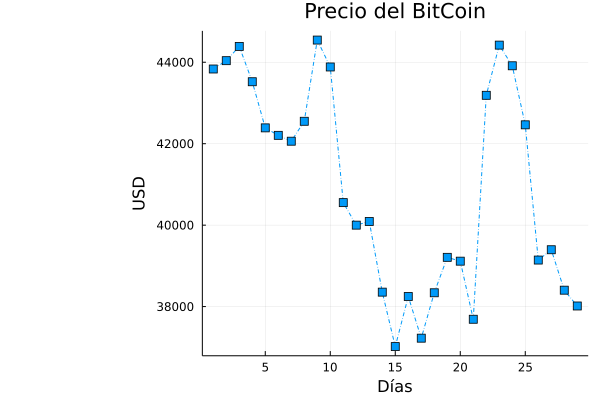

In [6]:
plot(dataBitcoin.Price, 
    title = "Precio del BitCoin", 
    xlabel = "Días",
    ylabel = "USD",
    linestyle = :dashdot,
    markershape = :rect,
    label= false,
    legend= :outerleft,
)

De acuerdo a la gráfica es muy difícil saber cuál es el modelo que mejor lo ajusta pues la distribución de los datos no muestra un comportamiendo conocido, por ello proponemos diversos modelos que nos permitan hacer un ajuste a los datos y evaluaremos cuál es más útil para poder predecir el precio del bitcoin de la siguiente semana.

#### Modelo 1

Los primeros modelos no lienales que podemos plantear son los modelos polinomiales, propondemos en este caso de grado 3 y 4 por el comportamiendo de los datos y, porque de grados superiores no nos permitirían predecir de una buena manera los valores futuros dado que el alto grado nos arroja valores muy grandes en valor absoluto para los valores futuros.

Supongamos $p_n(x)$ un polinomio de grado $n$, queremos que este polinomio ajuste los datos y análogo a lo que hicimos en el punto 1 podemos usar mínimos cuadrados para minimizar el error, en dicho caso obtenemos el problema de optimización 

$$
    \mbox{arg min}_{\vec{x}} \| A\vec{x} - \vec{v} \|_2^2
$$

donde $\vec{v}$ es el vector de los datos dados y si $N$ es el número de datos entonces:

$$
    A = 
    \begin{pmatrix}
        1 & 1 & 1 & \cdots & 1 \\
        1 & 2 & 2^2 & \cdots & 2^n \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & N & N^2 & \cdots & N^n \\
    \end{pmatrix}.
$$

Creamos los elementos descritos para $n=3$ y $n=4$ para lo cual definimos una función auxiliar:

In [7]:
N = size(dataBitcoin.Price,1); # Obtenemos el número de datos suministrados

function genMat(n) # Definimos la función auxiliar 
    Mat = ones(N,1)
    c = Array((1:N))
    
    for i in 1:n
        Mat = [ Mat c.^i ]
    end
    
    return Mat
end
    
A3 = genMat(3); # Definimos la matriz para el polinomio de grado 3
A4 = genMat(4); # Definimos la matriz para el polinomio de grado 3

v = Array(dataBitcoin.Price); # Definimos el vector de los datos

Resolvemos por mínimos cuadrados

In [8]:
x3 = A3\v;
x4 = A4\v;

Graficamos los ajustes encontrados, para lo cual de nuevo construimos una función auxiliar:

In [9]:
function graAjus(A, x, b) # Definimos la función auxiliar
    model = Vector{Float64}(undef, N);
    dim = size(x, 1);

    for i in 1:dim  
        model += (x[i]*A[:,i])
    end
    
    plot( A[:,2], b, 
        title = "Precio del BitCoin", 
        xlabel = "Días",
        ylabel = "USD",
        linestyle = :dashdot,
        markershape = :rect,
        label = "Datos dados", 
        legend = :bottomleft)
    plot!( A[:,2], model, 
        label = "Modelo",
        markershape = :circle)
end;

##### Grado 3

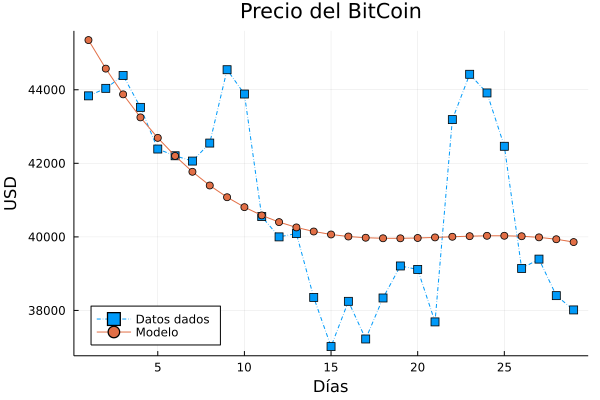

In [10]:
graAjus(A3, x3, v)

##### Grado 4

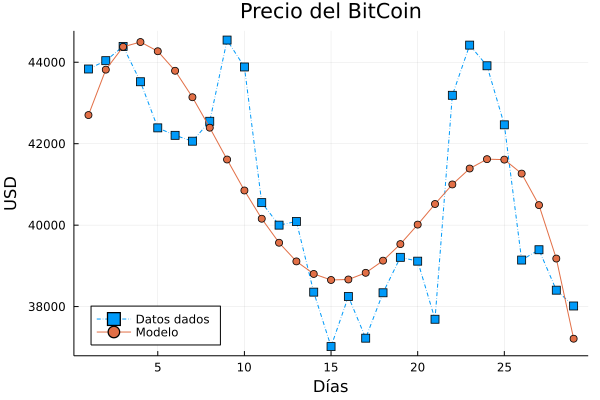

In [11]:
graAjus(A4, x4, v)

Las anteriores gráficas nos permiten ver cómo el modelo se ajusta a los datos, usamos estos para predecir los datos de la siguiente semana, para ello tenemos que definir las funciones de estos modelos:

In [12]:
f3(x) = x3[1] + x3[2]*x + x3[3]*x^2 + x3[4]*x^3;
f4(x) = x4[1] + x4[2]*x + x4[3]*x^2 + x4[4]*x^3 + x4[5]*x^4;

Para comparar el resultado de predicción con los valores reales importamos de una base de datos los valores reales de la siguiente semana:

In [13]:
DataBitcoinFuture0 = CSV.read("data/BitcoinWeekAhead.csv", DataFrame); # Leemos los datos del archivo CSV
dataBitcoinFuture = sort!(DataBitcoinFuture0) # Ordenamos los datos

dataBitcoinFuture.Price .= replace.(dataBitcoinFuture.Price, "," => ""); # Arreglamos los datos
dataBitcoinFuture.Price = parse.(Float64, dataBitcoinFuture.Price); # Cambiamos el tipo de dato

dataBitcoinFuture # Mostramos los datos

,Date,Price,Open,High,Low,Vol.,Change %
,String15,Float64,String15,String15,String15,String7,String7
1,"Mar 08, 2022",38744.8,"38,020.6","39,351.5","37,886.6",2.67B,1.89%
2,"Mar 09, 2022",41929.0,"38,731.5","42,538.5","38,663.3",3.60B,8.22%
3,"Mar 10, 2022",39416.3,"41,933.9","42,029.1","38,603.5",3.62B,-5.99%
4,"Mar 11, 2022",38730.2,"39,422.5","40,177.0","38,236.4",2.79B,-1.74%
5,"Mar 12, 2022",38814.3,"38,730.2","39,355.3","38,666.5",1.11B,0.22%
6,"Mar 13, 2022",37792.4,"38,813.2","39,272.3","37,603.4",1.55B,-2.63%
7,"Mar 14, 2022",39671.1,"37,789.5","39,914.3","37,613.6",2.33B,4.97%


Luego podemos ver las gráficas de los valores predecidos con los modelos contra los valores reales:

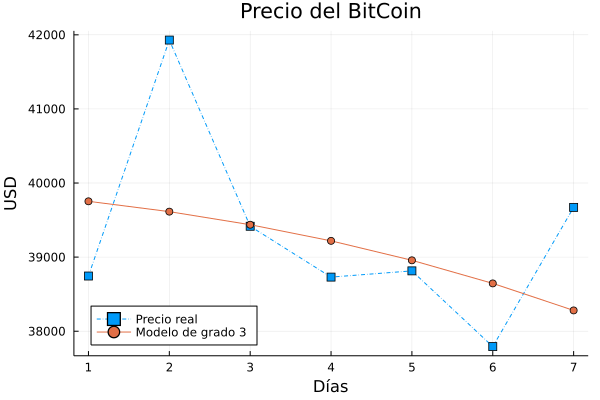

In [14]:
model3 = f3.(30:36) 
model4 = f4.(30:36)

plot(1:7, dataBitcoinFuture.Price,
    title = "Precio del BitCoin", 
    xlabel = "Días",
    ylabel = "USD",
    label = "Precio real", 
    linestyle = :dashdot, 
    markershape = :rect, 
    legend = :bottomleft)
plot!(1:7, model3, 
    markershape = :circle, 
    label = "Modelo de grado 3")

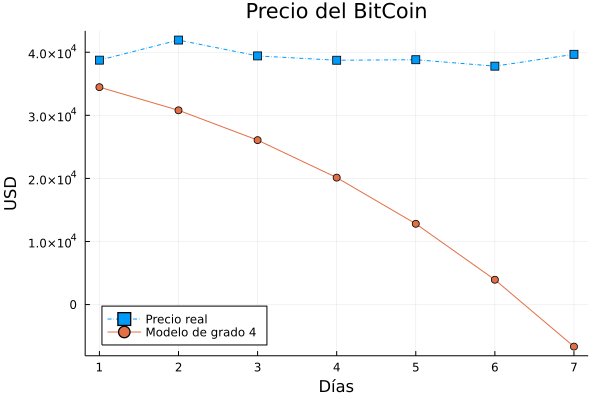

In [15]:
plot(1:7, dataBitcoinFuture.Price, 
    title = "Precio del BitCoin", 
    xlabel = "Días",
    ylabel = "USD",
    label = "Precio real",
    linestyle = :dashdot,
    markershape = :rect,
    legend = :bottomleft)
plot!(1:7, model4,
    markershape = :circle,
    label = "Modelo de grado 4")

Podemos calcular los errores relativos de las predicciones de estos modelos:

In [16]:
error3 = abs.(model3 - Array(dataBitcoinFuture.Price)) ./ Array(dataBitcoinFuture.Price)

7-element Vector{Float64}:
 0.026019079554273246
 0.05522355092177869
 0.0005253363816321181
 0.012630653760412669
 0.0036696008084316036
 0.0225627639758846
 0.03505195838170762

In [17]:
error4 = abs.(model4 - Array(dataBitcoinFuture.Price)) ./ Array(dataBitcoinFuture.Price)

7-element Vector{Float64}:
 0.11055361537931761
 0.26555855178288057
 0.33869850019714426
 0.4804283768230652
 0.6701419469951387
 0.8958799580808328
 1.1679340920156862

A groso modo podemos decir que los datos se predicen de mejor manera con el modelo de grado 3 donde la media del error relativo promedio es

In [18]:
mean(error3)

0.022240420540588647

Con lo cual el riesgo empírico es bajo.

#### Modelo 2

Con ánimo de poder propones otro modelo observemos lo siguiente:

Al hacer la regresión lineal de los datos obtenemos:

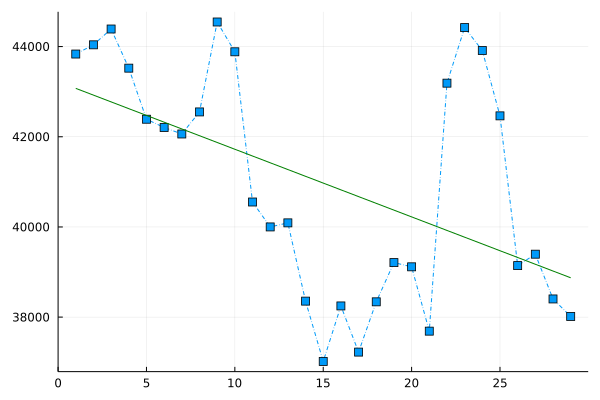

In [19]:
n = size(dataBitcoin.Price,1); # Cantidad de datos
A = [ones(n,1) Array((1:n))]; # Matriz del sistema de mínimos cuadrados (se discute luego)
b = Array(dataBitcoin.Price);
xl = A\b; # Solucionamos por mínimos cuadrados y encontramos los parámetros del modelo lineal

lmodel = xl[2]*A[:,2] + xl[1]*ones(n,1) # Definimos el modelo lineal encontrado

plot(1:n, b, linestyle = :dashdot, markershape = :rect, legend = false, xlims = (0, n + 0.99)) # Graficamos los puntos
plot!(1:n, lmodel, color = "green") # Graficamos la aproximación lineal

Al ver esta recta de ajuste como nuestro eje principal podemos ver un comportamiendo conocido en los datos:

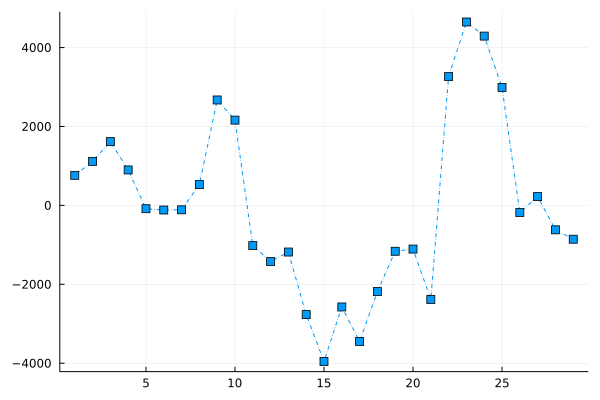

In [20]:
plot(1:n, b - lmodel, linestyle = :dashdot, markershape = :rect, legend = false)

El comportamiendo que presentan los datos sobre esta recta se parece a una función sinusoidal, razón tiene sentido proponer un modelo de la forma $ a_0 + a_1 x + a_2 \sin(x) + a_3 \cos(x) $ al que llamaremos seno-lineal que usando mínimos cuadrados queremos minimizar $ (a_0 + a_1 x + a_2 \sin(x_i) + a_3 \cos(x_i) - v_i)^2$, esto es

$$
    \mbox{arg min}_{\vec{x}} \| A\vec{x} - \vec{v} \|_2^2
$$

donde $\vec{v}$ es el vector de los datos dados transformado y

$$
    A = 
    \begin{pmatrix}
        1 & 1 & \sin(1) & \cos(1) \\
        1 & 2 & \sin(2) & \cos(2) \\
        \vdots & \vdots & \vdots & \vdots \\
        1 & N & \sin(N) & \cos(N)\\
    \end{pmatrix}.
$$

Construimos los elementos descritos:

In [21]:
N = size(dataBitcoin.Price,1); # Obtenemos el número de datos suministrados

A = Array((1:N));
A = A = [ ones(N) A sin.(A) cos.(A)];

v = b;

Solucionamos

In [22]:
xs = A\v;

Graficamos el modelo:

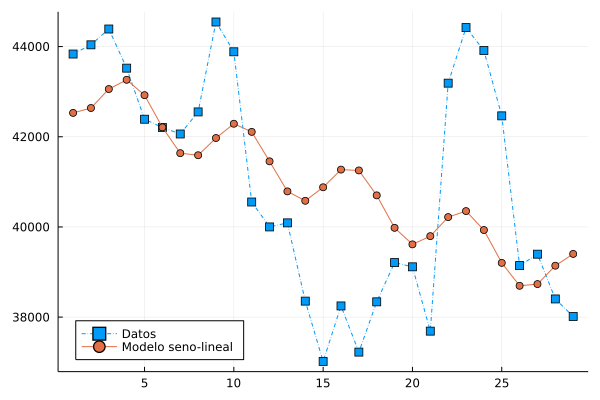

In [23]:
smodel = ones(n)*xs[1] + (1:n).*xs[2] + sin.(1:n)*xs[3] + cos.(1:n)*xs[4]
plot(1:n, b, 
    linestyle = :dashdot, 
    markershape = :rect,
    label = "Datos",
    legend = :bottomleft)
plot!(1:n, smodel, 
    markershape = :circle,
    label = "Modelo seno-lineal")

Las anteriores gráficas nos permiten ver cómo el modelo se ajusta a los datos, usamos estos para predecir los datos de la siguiente semana con la siguiente función:

In [24]:
fs(x) = xs[1] + xs[2]*x + xs[3]*sin(x) + xs[4]*cos(x);

Graficamos y tenemos

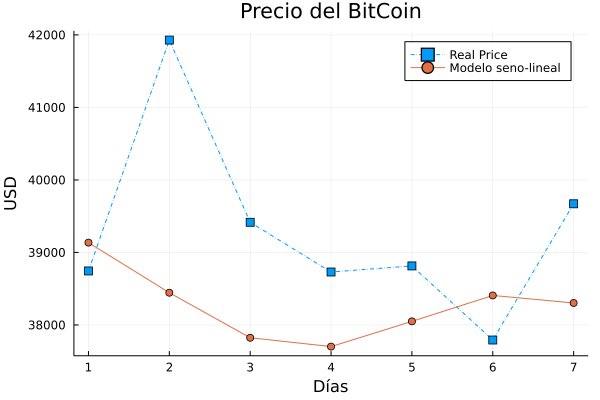

In [25]:
models = fs.(30:36)

plot(1:7, dataBitcoinFuture.Price,
    title = "Precio del BitCoin", 
    xlabel = "Días",
    ylabel = "USD",
    label = "Real Price", 
    linestyle = :dashdot, 
    markershape = :rect, 
    legend = :bottomleft)
plot!(1:7, models, 
    markershape = :circle, 
    label = "Modelo seno-lineal",
    legend = :topright)

Calculamos el error relativo de este modelo de ajuste

In [26]:
errors = abs.(models - Array(dataBitcoinFuture.Price)) ./ Array(dataBitcoinFuture.Price)

7-element Vector{Float64}:
 0.010083975226737093
 0.08309969804862696
 0.04041069102055245
 0.02655707338661981
 0.019691954294569023
 0.01626037781144177
 0.034485406875495

Con lo cual el error promedio es de

In [27]:
mean(errors)

0.03294131095200602

#### Conclusiones

En lo anterior pudimos evidenciar que **el mejor modelo fue el polinomio de grado 3** con el cual tuvimos el menor error promedio (2.2%) al predecir los datos de la siguiente semana, adicional pudimos ver que el modelo de ajuste con el polinomio de grado 4 pierde el sentido al predecir valores futuros. El intento del modelo 2 no resultó ser mejor que el del polinomio de grado 3 pero se podría con es idea agregar más elementos como factores de hasta grado 3 y hacer un modelo que ajuste mejor los datos y también la predicción de la siguiente semana.

###  Punto 3
    
*Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year.*    

Lo primero que tenemos que hacer para ver la relación entre las tres variables anteriores es la recolección de los datos, para esto hacemos uso de la herramienta de paga [Lumber](https://www.timmsanywhere.com/en_US/page/timber-accounting-software) donde descargamos los datos de sus valores en el último año. Estos datos obtenidos no coinciden con las fechas con lo cual filtramos los archivos de manera que puedan coincidir la mayor cantidad de fechas  para los 3 bienes. Procedemos a leer los datos

In [28]:
using Dates
using CSV
using DataFrames

# Import the dataBitcoin as dataframe
DataBitcoinYear0 = CSV.read("data/BitcoinYear.csv", DataFrame);

# Take raw information and parse it to float number figures
DataBitcoinYear0.Price .= replace.(DataBitcoinYear0.Price, "." => "");
DataBitcoinYear0.Price .= replace.(DataBitcoinYear0.Price, "," => ".");
DataBitcoinYear0.Fecha = parse.(Date, DataBitcoinYear0.Date, dateformat"d.m.y")
DataBitcoinYear0.Price = parse.(Float64, DataBitcoinYear0.Price);
dataBitcoinYear = sort!(DataBitcoinYear0)

Bitcoin = dataBitcoinYear.Price

# Import the dataOil as dataframe
DataOilYear0 = CSV.read("data/OilYear.csv", DataFrame);

# Take raw information and parse it to float number figures
DataOilYear0.Price .= replace.(DataOilYear0.Price, "." => "");
DataOilYear0.Price .= replace.(DataOilYear0.Price, "," => ".");
DataOilYear0.Fecha = parse.(Date, DataOilYear0.Date, dateformat"d.m.y")
DataOilYear0.Price = parse.(Float64, DataOilYear0.Price);
dataOilYear = sort!(DataOilYear0)

Oil = dataOilYear.Price

# Import the dataGold as dataframe
DataGoldYear0 = CSV.read("data/GoldYear.csv", DataFrame);

# Take raw information and parse it to float number figures
DataGoldYear0.Price .= replace.(DataGoldYear0.Price, "." => "");
DataGoldYear0.Price .= replace.(DataGoldYear0.Price, "," => ".");
DataGoldYear0.Fecha = parse.(Date, DataGoldYear0.Date, dateformat"d.m.y")
DataGoldYear0.Price = parse.(Float64, DataGoldYear0.Price);
dataGoldYear = sort!(DataGoldYear0)

Gold = dataGoldYear.Price

# Import the dataSilver as dataframe
DataSilverYear0 = CSV.read("data/SilverYear.csv",DataFrame);

# Take raw information and parse it to float number figures
DataSilverYear0.Price .= replace.(DataSilverYear0.Price, "." => "");
DataSilverYear0.Price .= replace.(DataSilverYear0.Price, "," => ".");
DataSilverYear0.Fecha = parse.(Date, DataSilverYear0.Date, dateformat"d.m.y")
DataSilverYear0.Price = parse.(Float64, DataSilverYear0.Price);
dataSilverYear = sort!(DataSilverYear0)

Silver = dataSilverYear.Price;

Graficamos los precios de los diferentes activos durante el último año (su valor de cierre):

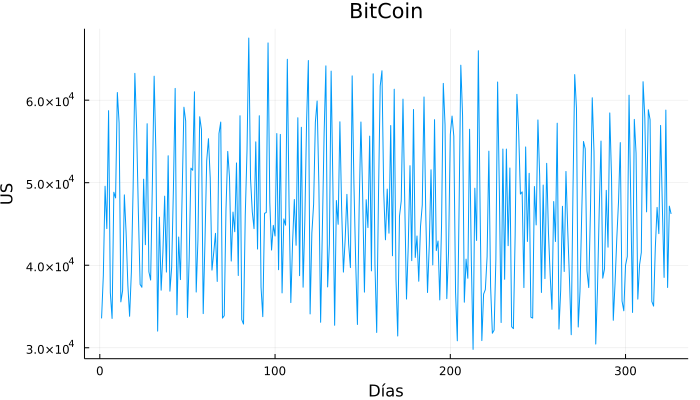

In [29]:
plot(Bitcoin, title = "BitCoin", xlabel = "Días", ylabel = "US", legend = false, size = (700,400))

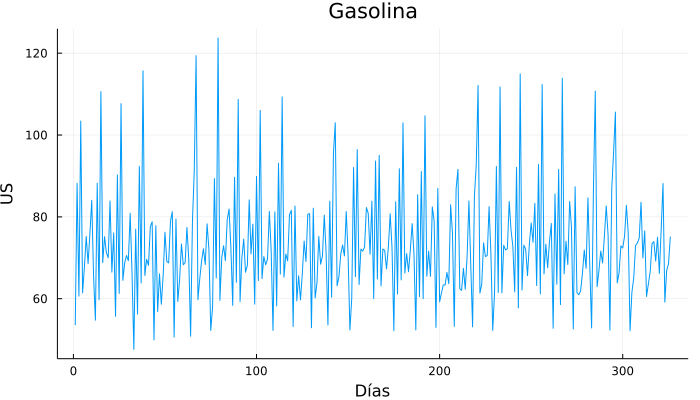

In [30]:
plot(Oil, title = "Gasolina", xlabel = "Días", ylabel = "US", legend = false, size = (700,400))

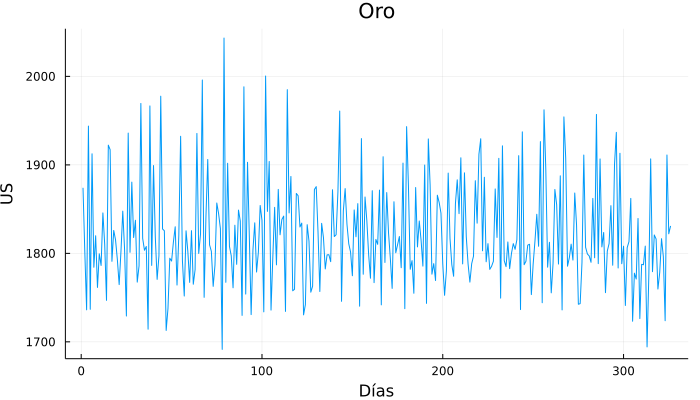

In [31]:
plot(Gold, title = "Oro", xlabel = "Días", ylabel = "US", legend = false, size = (700,400))

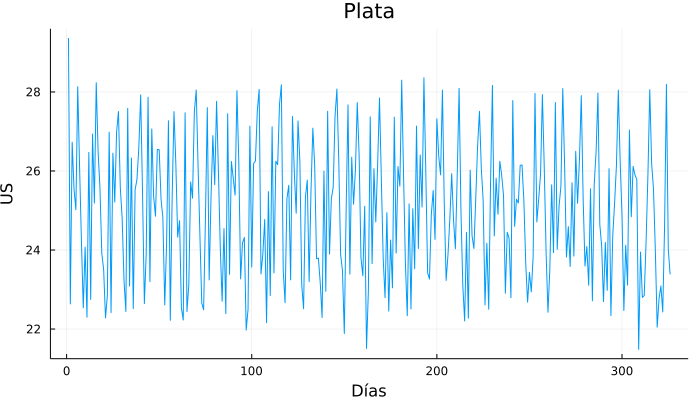

In [32]:
plot(Silver, title = "Plata", xlabel = "Días", ylabel = "US", legend = false, size = (700,400))

A simple vista podemos observar que los comportamientos de estos activos es muy variable, presentando mucho picos en las gráficas salvo el del activo de la gasolina.

Procedemos a calcular mediante mínimos cuadrados el hiperplano que mejor ajuste estos datos siguiendo el desarrollo planteado en el primer punto:

In [33]:
N = size(Bitcoin, 1)
A = [ones(N,1) Oil Gold Silver]
x = A \ Bitcoin;

Los parámetros obtenidos nos retornan un error que podemos medir en cierta medida con la media de las diferencias al cuadrado:

In [34]:
mean((A*x - Bitcoin).^2)

6.3297916696794815e7

Este valor, que es considerablemente grande quiere decir en cierta medida que el error cometido del ajuste de los datos por un hiperplano es muy alto con lo cual los datos no satisface una linealidad conjuntamente. Analizamos los datos de Bitcoin con los otros activos:

Graficamente:

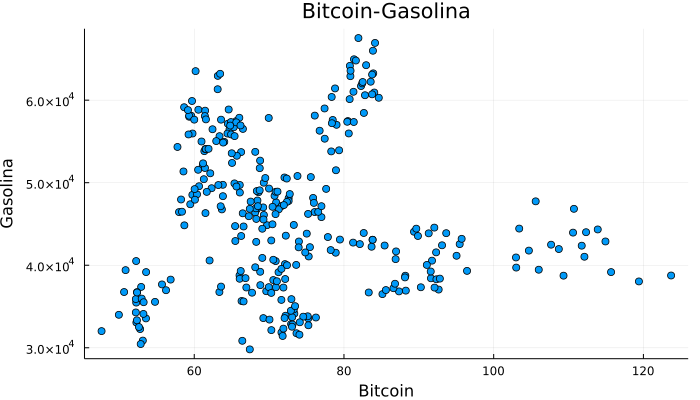

In [35]:
plot(Oil, Bitcoin, seriestype = :scatter, title = "Bitcoin-Gasolina", xlabel = "Bitcoin", ylabel = "Gasolina", legend = false, size = (700,400))

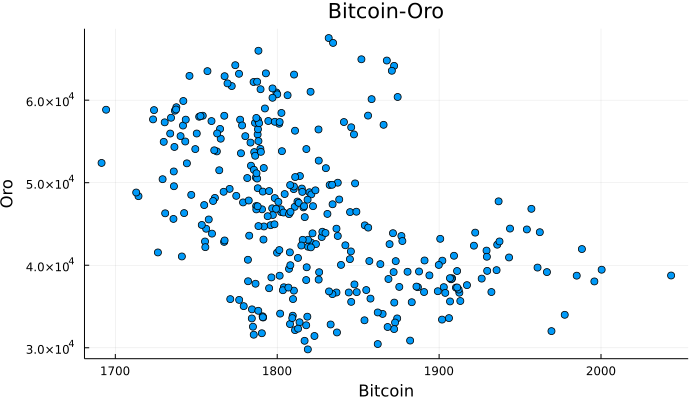

In [36]:
plot(Gold, Bitcoin, seriestype = :scatter, title = "Bitcoin-Oro", xlabel = "Bitcoin", ylabel = "Oro", legend = false, size = (700,400))

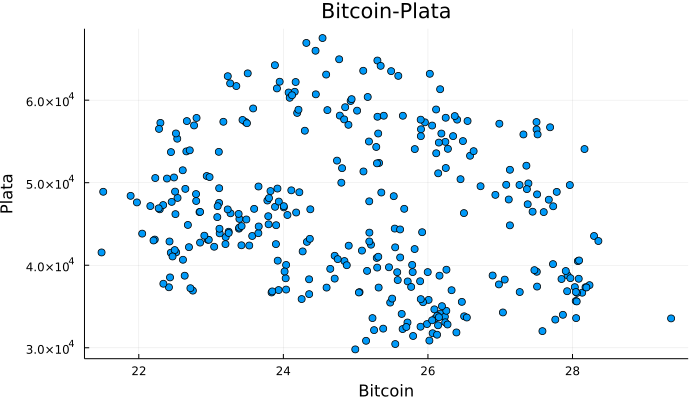

In [37]:
plot(Silver, Bitcoin, seriestype = :scatter, title = "Bitcoin-Plata", xlabel = "Bitcoin", ylabel = "Plata", legend = false, size = (700,400))

Graficamente vemos que efectivamente no parece haber una relación lineal en los datos, con lo cual para encontrar la relación entre estas variables tendríamos que hacer un análisis de covarianza o análisis de correlación.

###  Punto 4
    
*Solve the [point set registration problem](https://en.wikipedia.org/wiki/Point-set_registration). Hint (check: S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991). Construct a GUI to test.*    

El problema de *Registro de conjunto de puntos* enuncia:

Dado un conjuntos de puntos $\{\mathcal{M},\mathcal{S}\} = \{ (x_i)_{1\leq i \leq n} , (y_i)_{1\leq i \leq m} \} \subset \mathbb{R}^d$ encuentre una trasformación $T^* : \mathbb{R}^d \to \mathbb{R}^d$ de tal forma que los puntos $T(\mathcal{M})$ esten mejor alineados con los puntos $\mathcal{S}$, es decir, que de acuerdo a una función de distancia $\mathbf{dist}(\cdot, \cdot)$ tengamos

$$
    T^*=\arg \min _{T \in \mathcal{T}} \mathbf{dist}(T(\mathcal{M}), \mathcal{S})
$$

donde $\mathcal{T}$ es el  conjuntos de todas transformaciones que escalan, rotan y transladan.

En general puede ocurrir que tengamos que $n \neq m$, para el desarrollo de este ejercicio empezaremos analizando el caso en que $n=m$, para ello haremos uso del resultado que encontramos en [1](https://web.stanford.edu/class/cs273/refs/umeyama.pdf):

En el teorema nos proveen el valor exacto del error de mínimos cuadrados y la transformación que buscamos. Procedemos a elaborar los métodos necesarios para el final enunciar el resultado con la transformación de acuerdo a los datos:

Usamos en paquete *LinearAlgebra* para poder sacar la descomposición en valores singulares de una matriz, también usamos el paquete de *Statistics* en que cual contamos con la media y la varianza 

$$
\mu_x = \frac{1}{N} \sum_{i = 1}^{N} \textbf{x}_i \quad \sigma_x^2 = \frac{1}{N} \sum_{i=1}^{N} ||\textbf{x}_i - \textbf{$\mu$}_x||^2
$$  

Definimos la matriz de covarianza:

$$
\Sigma_{xy} = \frac{1}{N} \sum_{i=0}^{N} (\textbf{y}_i -\mu_y)(\textbf{x}_i - \mu_x)^{T}
$$

In [38]:
using LinearAlgebra, Statistics

function MatCov(X,Y)
    dim = size(X[1], 1);
    N = size(X, 1)
    Σ_x_y = zeros(Float64, dim, dim);
        for i in 1:N
            Σ_x_y += (Y[i] - mean(Y))*transpose(X[i] - mean(X));
        end
    return (1/N)*Σ_x_y
end;

Ahora, el teorema de la referencia [1] nos afirma que: si $UDV^T$ es la descomposición en valores singulares de la matriz de covarianza $\Sigma_{xy}$ de los datos $\mathcal{M}$ y $\mathcal{S}$, con $D = diag(d_i), d_1 \geq d_2, \cdots, \geq d_m \geq 0 $ entonces, si $rango(\Sigma{xy}) \geq m-1$ entonces podemos determinar la transformación óptima de manera única como $T^*(x) = cRx + t$ donde

$$
  R = USV^T, \quad c = \frac{1}{\sigma_x^2} Tr(DS)  \quad \text{y} \quad t = \mu_y - cR\mu_x
$$
y
$$
    S = 
    \begin{cases}
        I & \text{si } \det(\Sigma_{xy}) \geq 0\\
        diag(1, \ldots, 1, -1) & \text{si }\det(\Sigma_{xy}) <0. \\
    \end{cases}
$$

Si $rango(\Sigma{xy}) = m-1$ entonces 
$$
    S = 
    \begin{cases}
        I & \text{si } \det(U)\det(V) = 1\\
        diag(1, \ldots, 1, -1) & \text{si } \det(U)\det(V) = -1. \\
    \end{cases}
$$

Definimos una función para construir esta matriz:

In [39]:
function MatrizS(X,Y)
    Σ_x_y = MatCov(X,Y);
    U, D, V = svd(Σ_x_y);
    m = size(D, 1);
    
    ran = rank(Σ_x_y);
    
    if ran >= m-1
        if det(Σ_x_y) >= 0
            S = Matrix(I, m, m);
        else 
            S = Matrix(I, m, m)
            S[m,m] = -1;
        end
    elseif ran == m-1
        if det(U)*det(V) == 1
            S = Matrix(I, m, m);
        elseif det(U)*det(V) == -1
            S = Matrix(I, m, m);
            S[m,m] = -1;
        end
    end
    return S
end;

Ahora, construimos una función que nos retorne $c, R$ y $t$ los parámetros de la transformacion:

In [40]:
function vari(X)
    σ = 0;
    N = size(X,1)
    μ_x = mean(X)
    for i = 1:N
        σ += (norm(X[i] - μ_x))^2;
    end
    σ = (1/N)*σ;
    return σ
end

function PSRP(X, Y)
    Σ_x_y = MatCov(X,Y);
    U, D, V = svd(Σ_x_y);
    Ss = MatrizS(X, Y);
    
    R = U*Ss*transpose(V);
    
    μ_x = mean(X)
    μ_y = mean(Y)
    σ_x = vari(X)
    
    c = (1/σ_x)*tr(diagm(D)*Ss);
    t = μ_y - c*R*μ_x;
    
    return c, R, t
    
end;

Adicional tenemos en general que el error de mínimos cuadrados está dado por una expresión que podemos calcular:

$$
    \varepsilon^2 = \sigma_y^2 - \frac{1}{\sigma_x^2} Tr(DS)^2.
$$


Una vez definidos los elementos podemos dar solución al problema, veamos cómo aplicarlo en el siguiente ejemplo:

Consideremos que nos dan los siguientes datos

In [41]:
M = [
    [0, 0],  [12, 12], [12, 0], [2, 2],
    [4, 4],  [6, 6],   [8, 8],  [10, 10],
    [2, 0],  [4, 0],   [6, 0],  [8, 0],
    [10, 0], [12, 10], [12, 8], [12, 6],
    [12, 4], [12, 2]
];

S = [
    [16, 16],  [16, 17], [16, 18], [16, 19],
    [16, 20],  [16, 21], [16, 22], [17, 16],
    [18, 16],  [19, 16], [20, 16], [21, 16],
    [22, 16],  [17, 21], [18, 20], [19, 19],
    [20, 18],  [21, 17]
];

Graficamos estos conjuntos de datos:

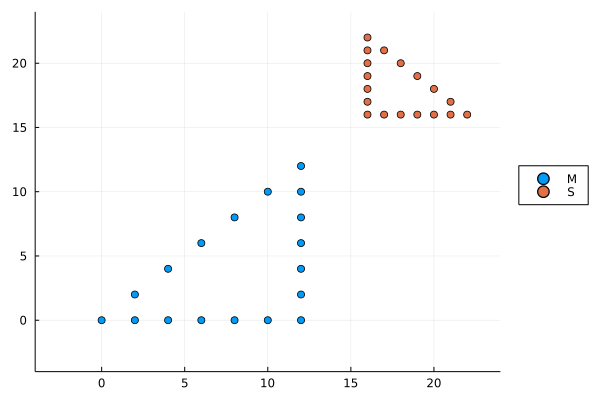

In [42]:
Mx = [ M[i][1] for i in 1:size(M,1)];
My = [ M[i][2] for i in 1:size(M,1)];

Sx = [ S[i][1] for i in 1:size(M,1)];
Sy = [ S[i][2] for i in 1:size(M,1)];

plot(Mx, My, seriestype = :scatter, xlims = (-4,24), ylims = (-4, 24), legend = :outerright, label = "M")
plot!(Sx, Sy, seriestype = :scatter, label = "S")

Solucionamos:

In [43]:
c, R, t = PSRP(M, S);

dim = size(M, 1);
n = size(M[1], 1);

A = [Mx My]
T_M = fill(0., dim, n);

for i in 1:dim
    T_M[i,:] = c*R*A[i, :] .+ t
end

La gráfica de la anteior solución es:

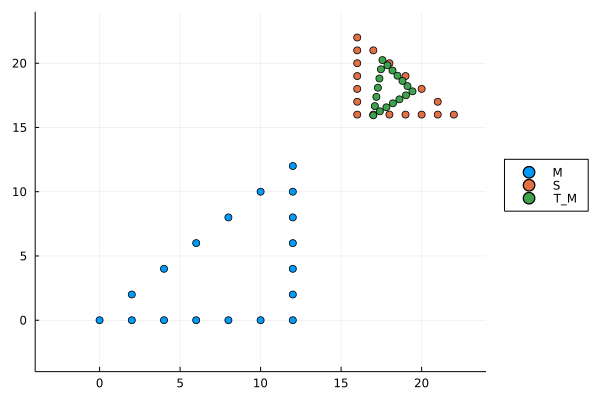

In [44]:
plot!(T_M[:,1], T_M[:,2], seriestype = :scatter, label = "T_M")

Lo hacemos de una forma más interactiva implementando una GUI.

#### GUI

Implementamos la macro @gif del paquete Plots con el que podemos generar una animación e incluso descargar la imagen de la transformación de los datos.

Para esta transformación de los datos lo hacemos fijando un parámetro de rotación final y recooriendo lo valores hasta dicho parámetro que representará la transformación final

┌ Info: Saved animation to 
│   fn = C:\Users\Juand\Desktop\Machine Learning\tmp.gif
└ @ Plots C:\Users\Juand\.julia\packages\Plots\tXtrW\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Juand\\Desktop\\Machine Learning\\tmp.gif")
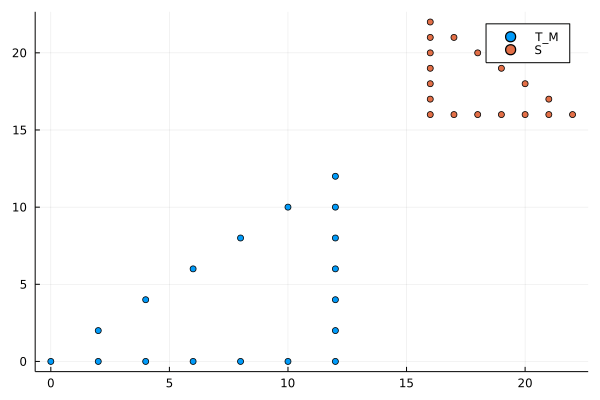

In [45]:
β = acos(R[1,1]);
Rot = Array([cos(β) -sin(β); sin(β) cos(β)]);

if (1. + ((c-1.)/β))*A*transpose(Rot) + ones(dim,2)*diagm(t) == T_M
    β = β
else
    β = -β
end

@gif for i in range(0, β, 100)
         Rot = Array([cos(i) -sin(i); sin(i) cos(i)])
         Z = (1. + ((c-1.)/β)*i)*A*transpose(Rot) + (i/β)*ones(dim,2)*diagm(t)
         scatter(Z[:,1], Z[:, 2], label = "T_M")
         scatter!(Sx, Sy, label = "S")
end 

## <center> Referencias

[1] S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991.